# OASIS INFOBYTE DATA SCIENCE INTERNSHIP, DECEMBER 2023 - JANUARY 2024

## BATCH December-P1

### PROBLEM STATEMENT - CAR PRICE PREDICTION WITH MACHINE LEARNING (TASK 3)

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives, and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

DOWNLOAD DATASET FROM HERE - https://www.kaggle.com%2Fdatasets%2Fvijayaadithyanvg%2Fcar-price-predictionused-cars&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document 

### SOLUTION

### AUTHOR - ARITRA BAG

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-predictionused-cars/car data.csv


#### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import gc

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#### IMPORTING THE DATASET

In [4]:
raw_data = pd.read_csv('/kaggle/input/car-price-predictionused-cars/car data.csv')
raw_data.head(25)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


#### EXPLORATORY ANALYSIS OF THE RAW DATA

In [5]:
print(raw_data.shape)

(301, 9)


In [6]:
print('\nThe number of null values in the dataset is : \n' + str(raw_data.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(raw_data.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(raw_data.info())
print('\nThe data distribution in the columns is given by :\n')
print(raw_data.describe())
print('\nThe number of unique values in the Car_Name is : ' + str(len(raw_data['Car_Name'].unique())))
print('\nThe number of unique values in the Year column is : ' + str(len(raw_data['Year'].unique())))
print('\nThe number of unique values in the Selling_Price column is : ' + str(len(raw_data['Selling_Price'].unique())))
print('\nThe number of unique values in the Present_Price column is : ' + str(len(raw_data['Present_Price'].unique())))
print('\nThe number of unique values in the Driven_kms column is : ' + str(len(raw_data['Driven_kms'].unique())))
print('\nThe number of unique values in the Fuel_Type column is : ' + str(len(raw_data['Fuel_Type'].unique())))
print('\nThe number of unique values in the Selling_type column is : ' + str(len(raw_data['Selling_type'].unique())))
print('\nThe number of unique values in the Transmission column is : ' + str(len(raw_data['Transmission'].unique())))
print('\nThe number of unique values in the Owner column is : ' + str(len(raw_data['Owner'].unique())))


The number of null values in the dataset is : 
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

The number of duplicate values in the dataset is : 2

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

The data distrib

#### DATA PREPROCESSING

In [7]:
car_data = raw_data

#Replacing the Year with age with respect to 2023
car_data['Age'] = 2023 - car_data['Year']
cloned_car_data = car_data
car_data = car_data.drop(['Year'], axis = 1)

#Encoding the fuel_type Values
fuel_encoder = LabelEncoder()
car_data['Fuel_Type'] = fuel_encoder.fit_transform(np.array(car_data['Fuel_Type']).reshape(-1,1))

#Encoding the Selling_type Values
selling_type_encoder = LabelEncoder()
car_data['Selling_type'] = selling_type_encoder.fit_transform(np.array(car_data['Selling_type']).reshape(-1,1))

#Encoding the Selling_type Values
transmission_encoder = LabelEncoder()
car_data['Transmission'] = transmission_encoder.fit_transform(np.array(car_data['Transmission']).reshape(-1,1))

#### EXPLORATORY ANALYSIS OF THE PROCESSED DATA

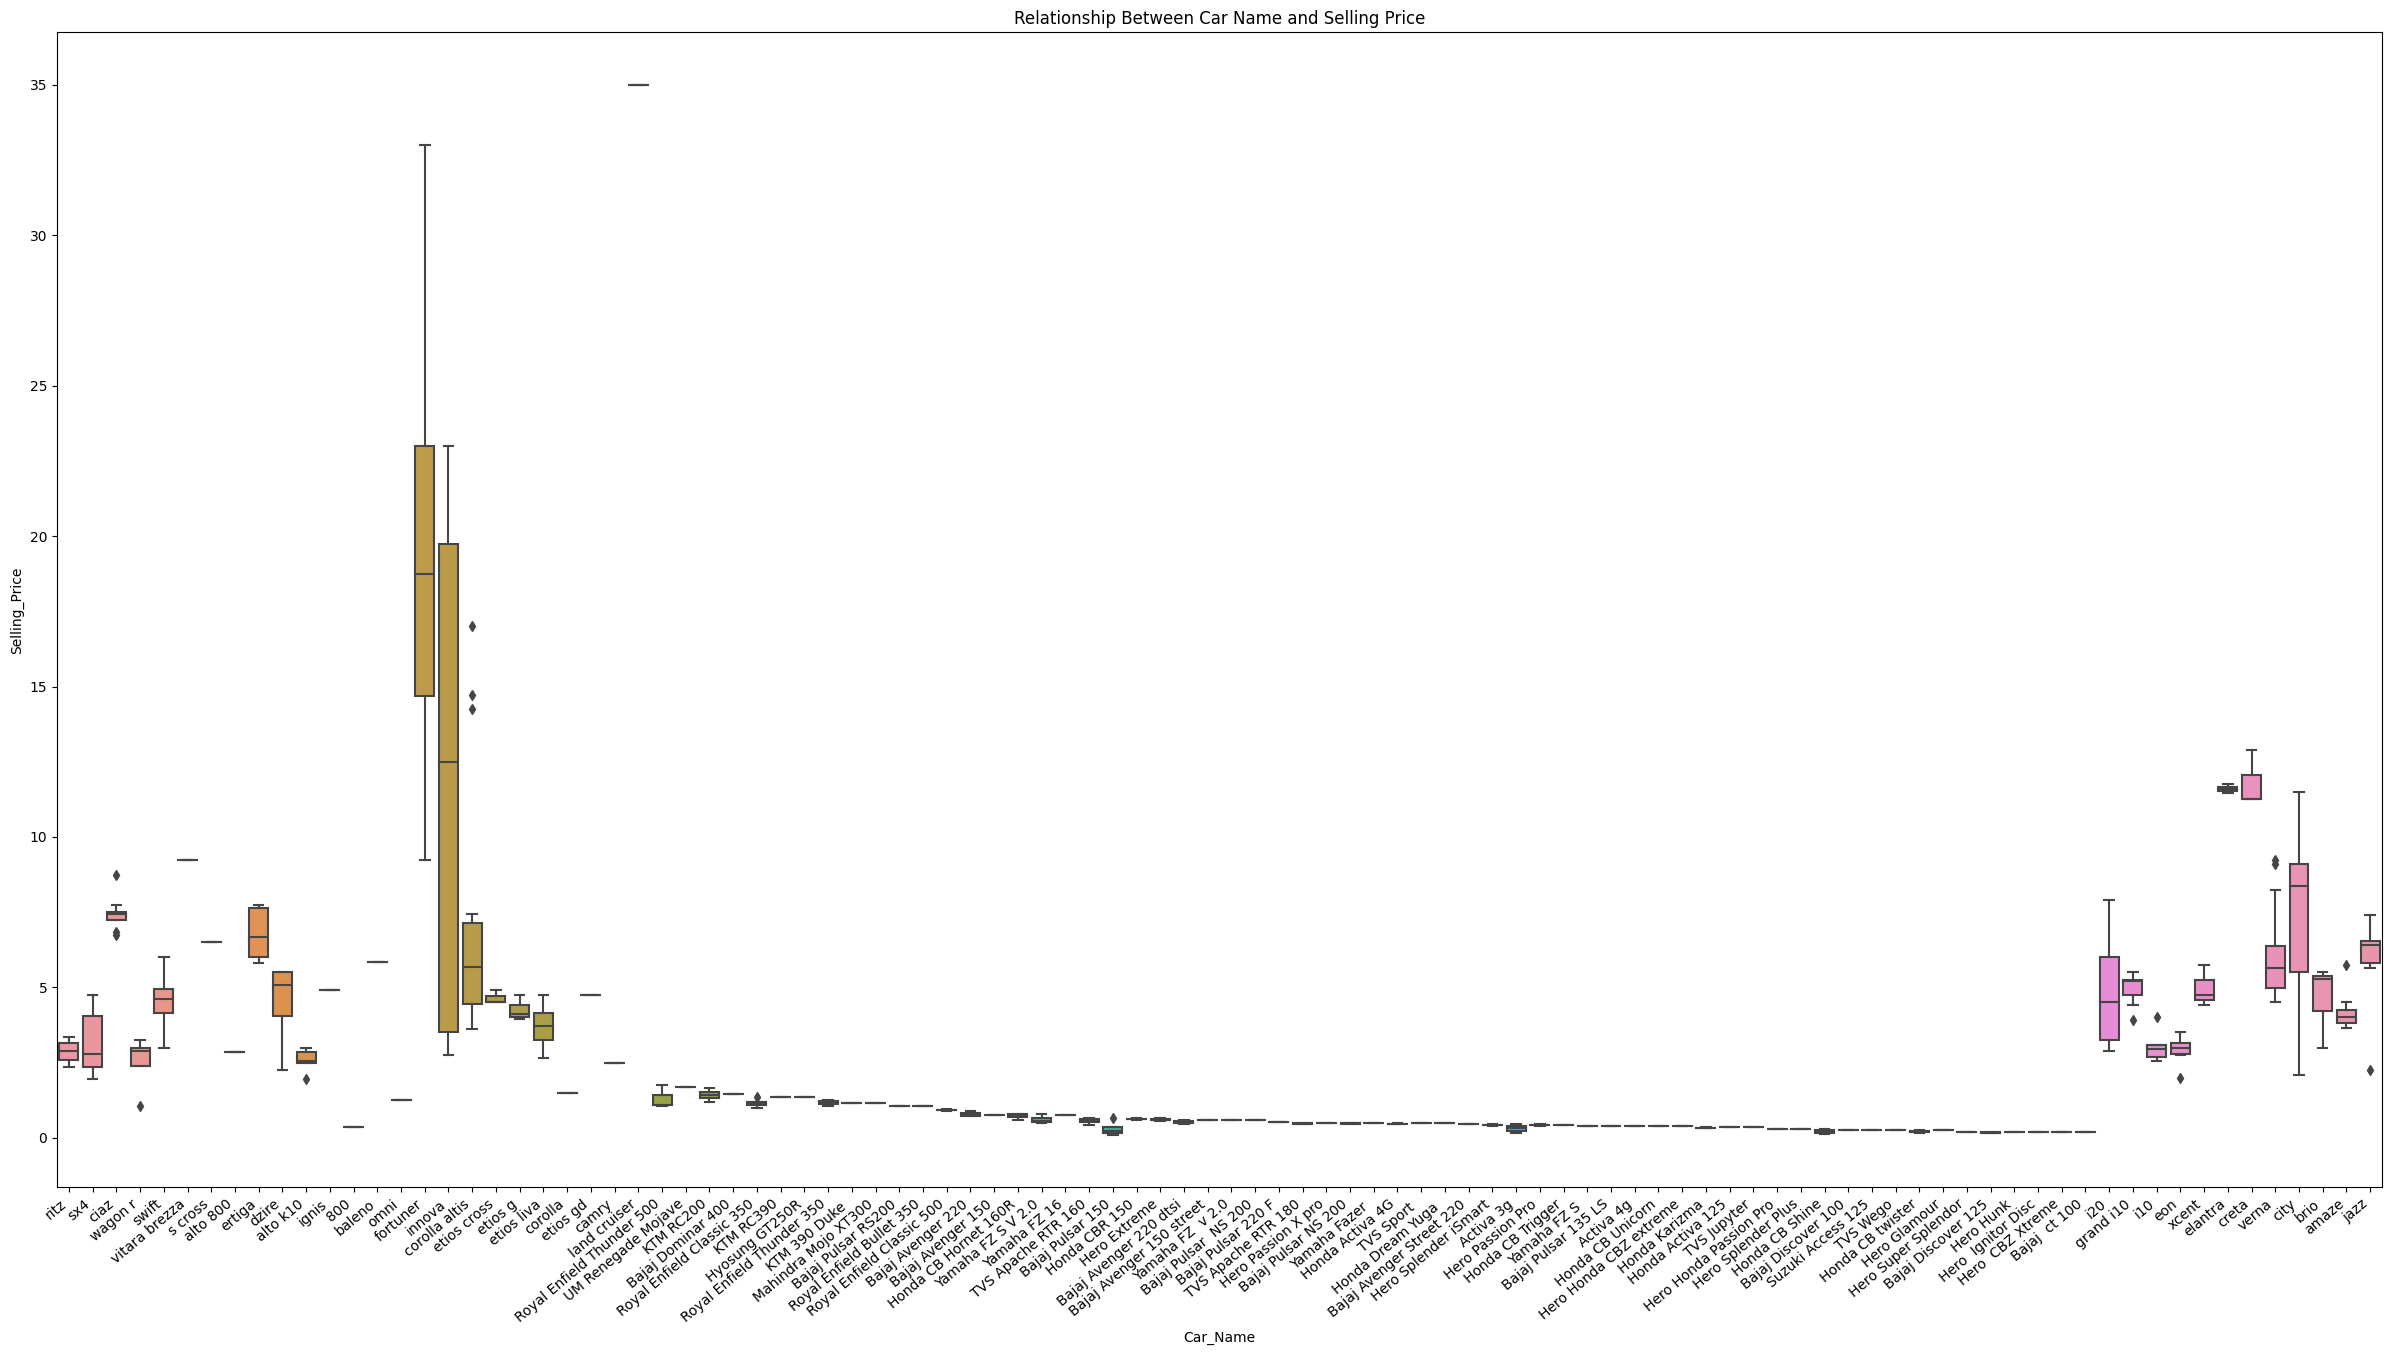

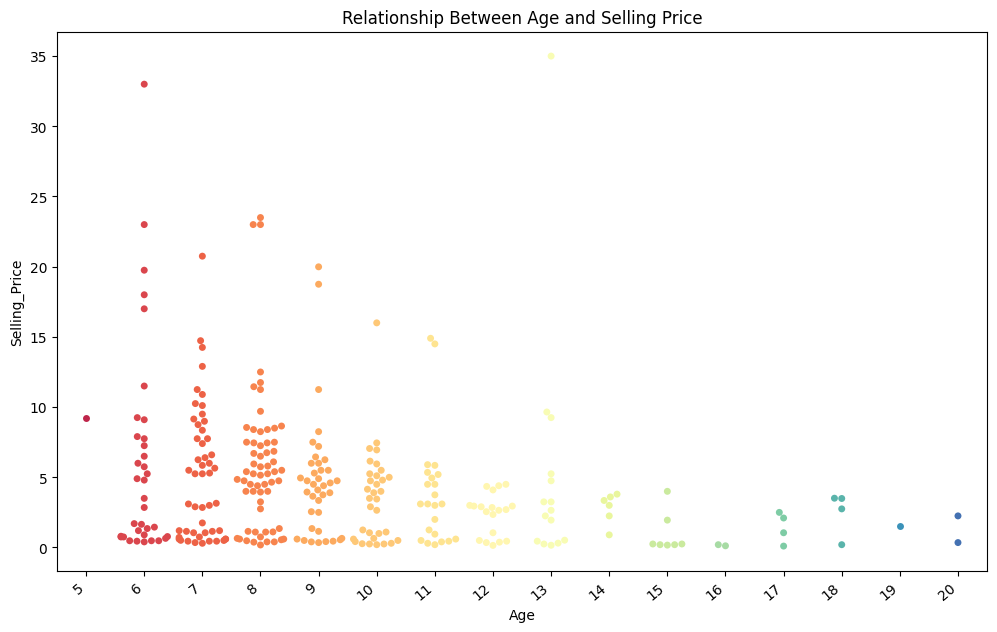

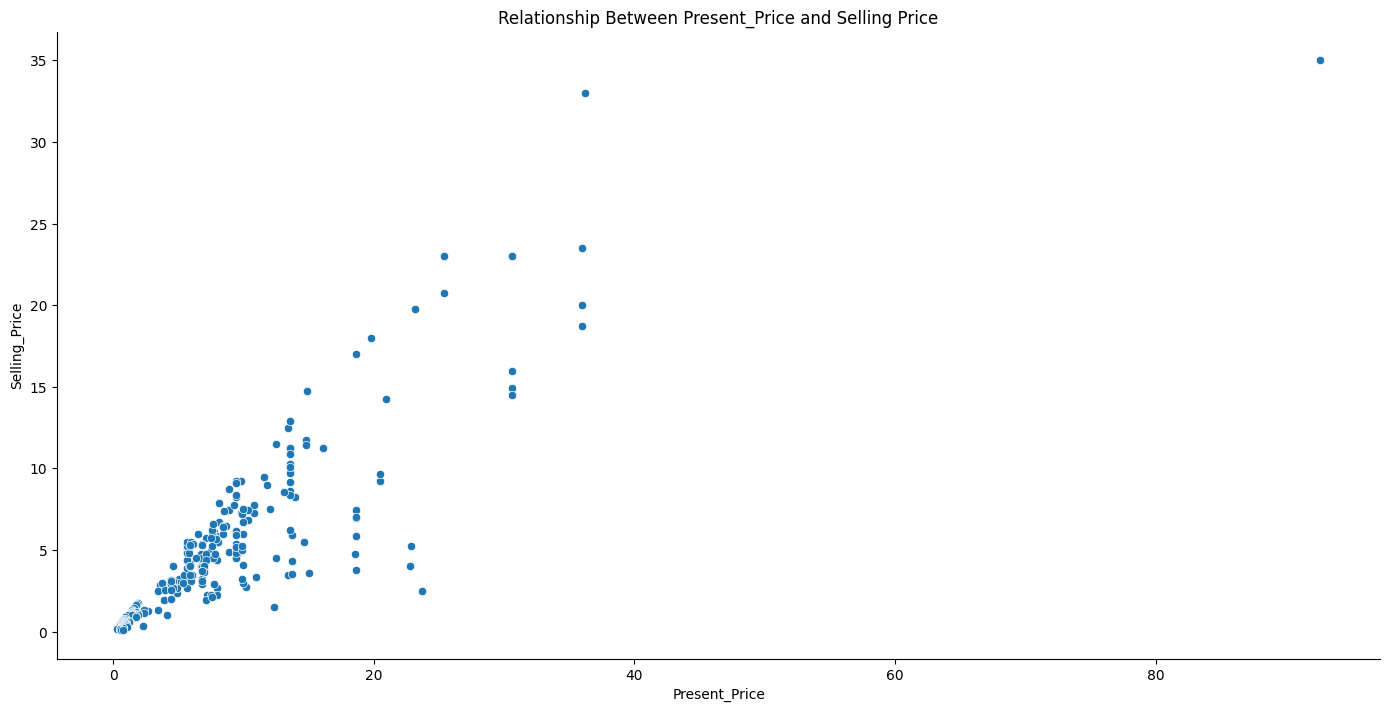

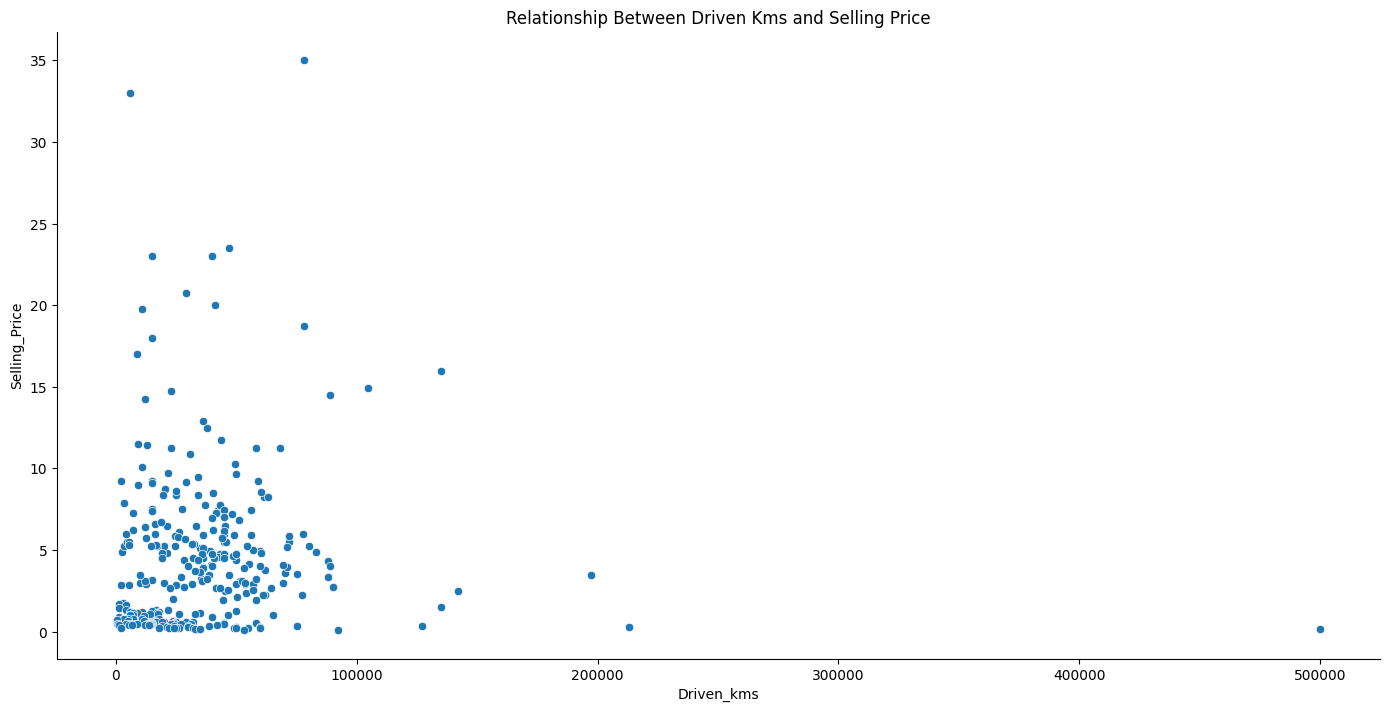

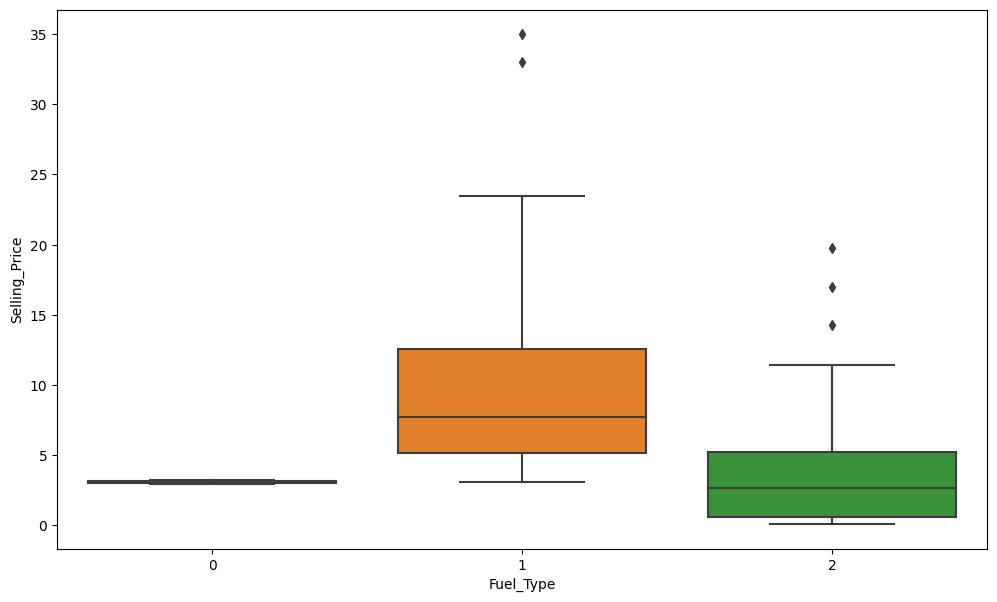

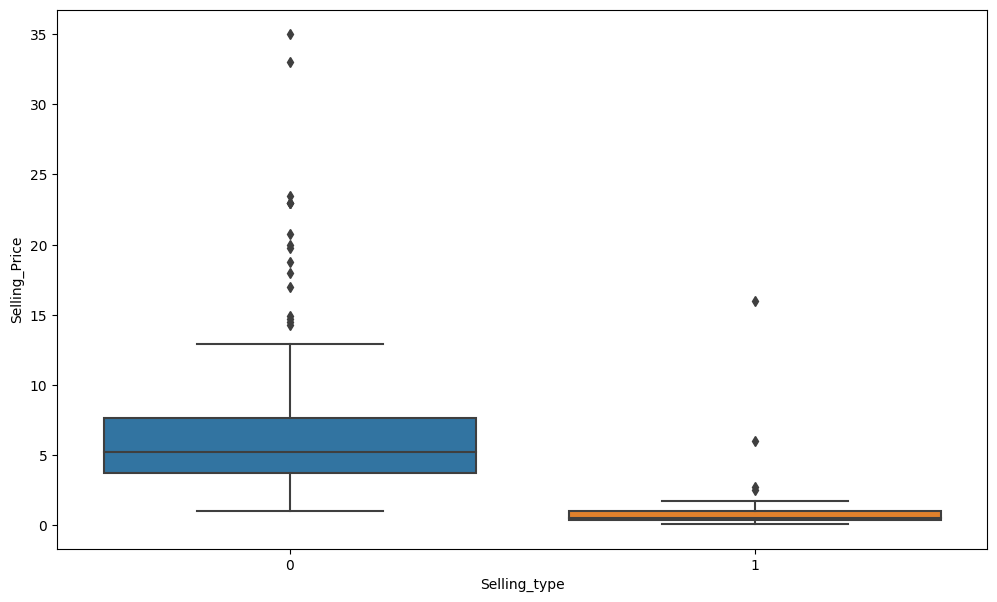

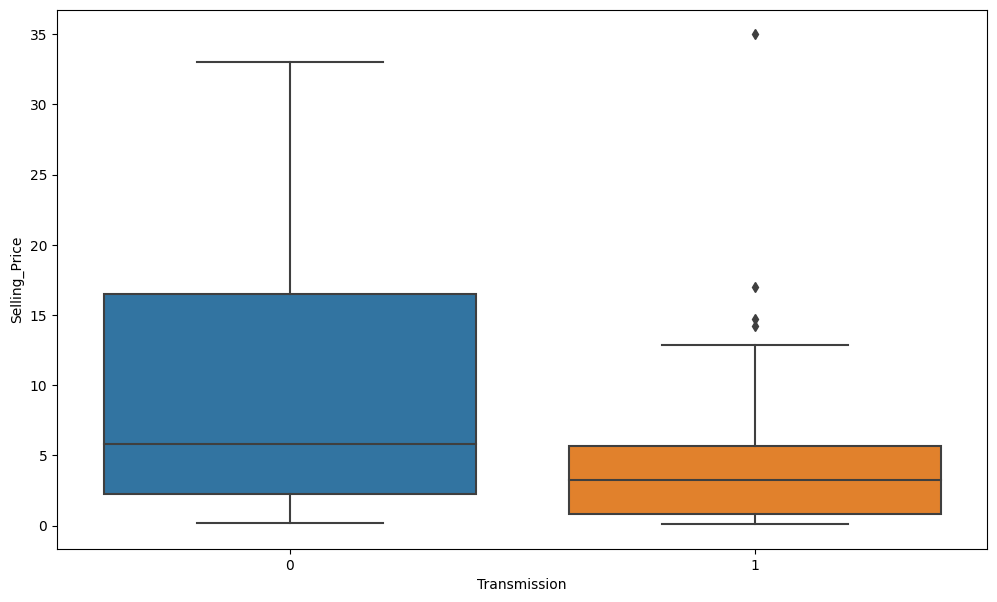

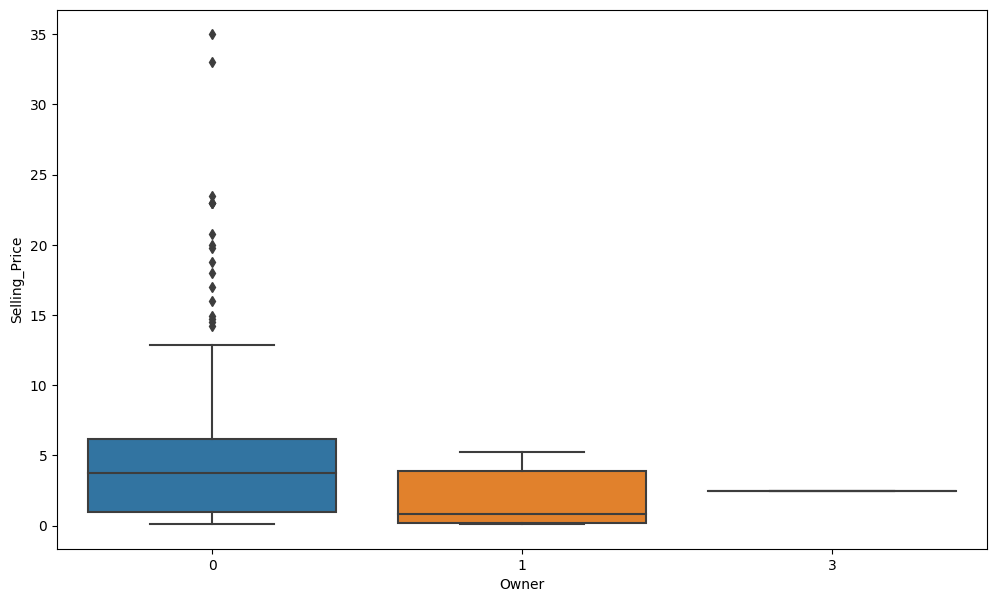

In [8]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (30,15))
ax=sns.boxplot(x='Car_Name',y='Selling_Price',data=car_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title('Relationship Between Car Name and Selling Price')
plt.show()

plt.figure(figsize = (12,7))
ax=sns.swarmplot(x='Age',y='Selling_Price',data=car_data, palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.title('Relationship Between Age and Selling Price')
plt.show()

sns.relplot(x='Present_Price',y='Selling_Price', data=car_data, height = 7, aspect = 2, palette = 'Spectral')
plt.title('Relationship Between Present_Price and Selling Price')
plt.show()

sns.relplot(x='Driven_kms',y='Selling_Price', data=car_data, height = 7, aspect = 2, palette = 'Spectral')
plt.title('Relationship Between Driven Kms and Selling Price')
plt.show()

plt.figure(figsize = (12,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=car_data)
plt.show()

plt.figure(figsize = (12,7))
sns.boxplot(x='Selling_type',y='Selling_Price',data=car_data)
plt.show()

plt.figure(figsize = (12,7))
sns.boxplot(x='Transmission',y='Selling_Price',data=car_data)
plt.show()

plt.figure(figsize = (12,7))
sns.boxplot(x='Owner',y='Selling_Price',data=car_data)
plt.show()

<Figure size 640x480 with 0 Axes>

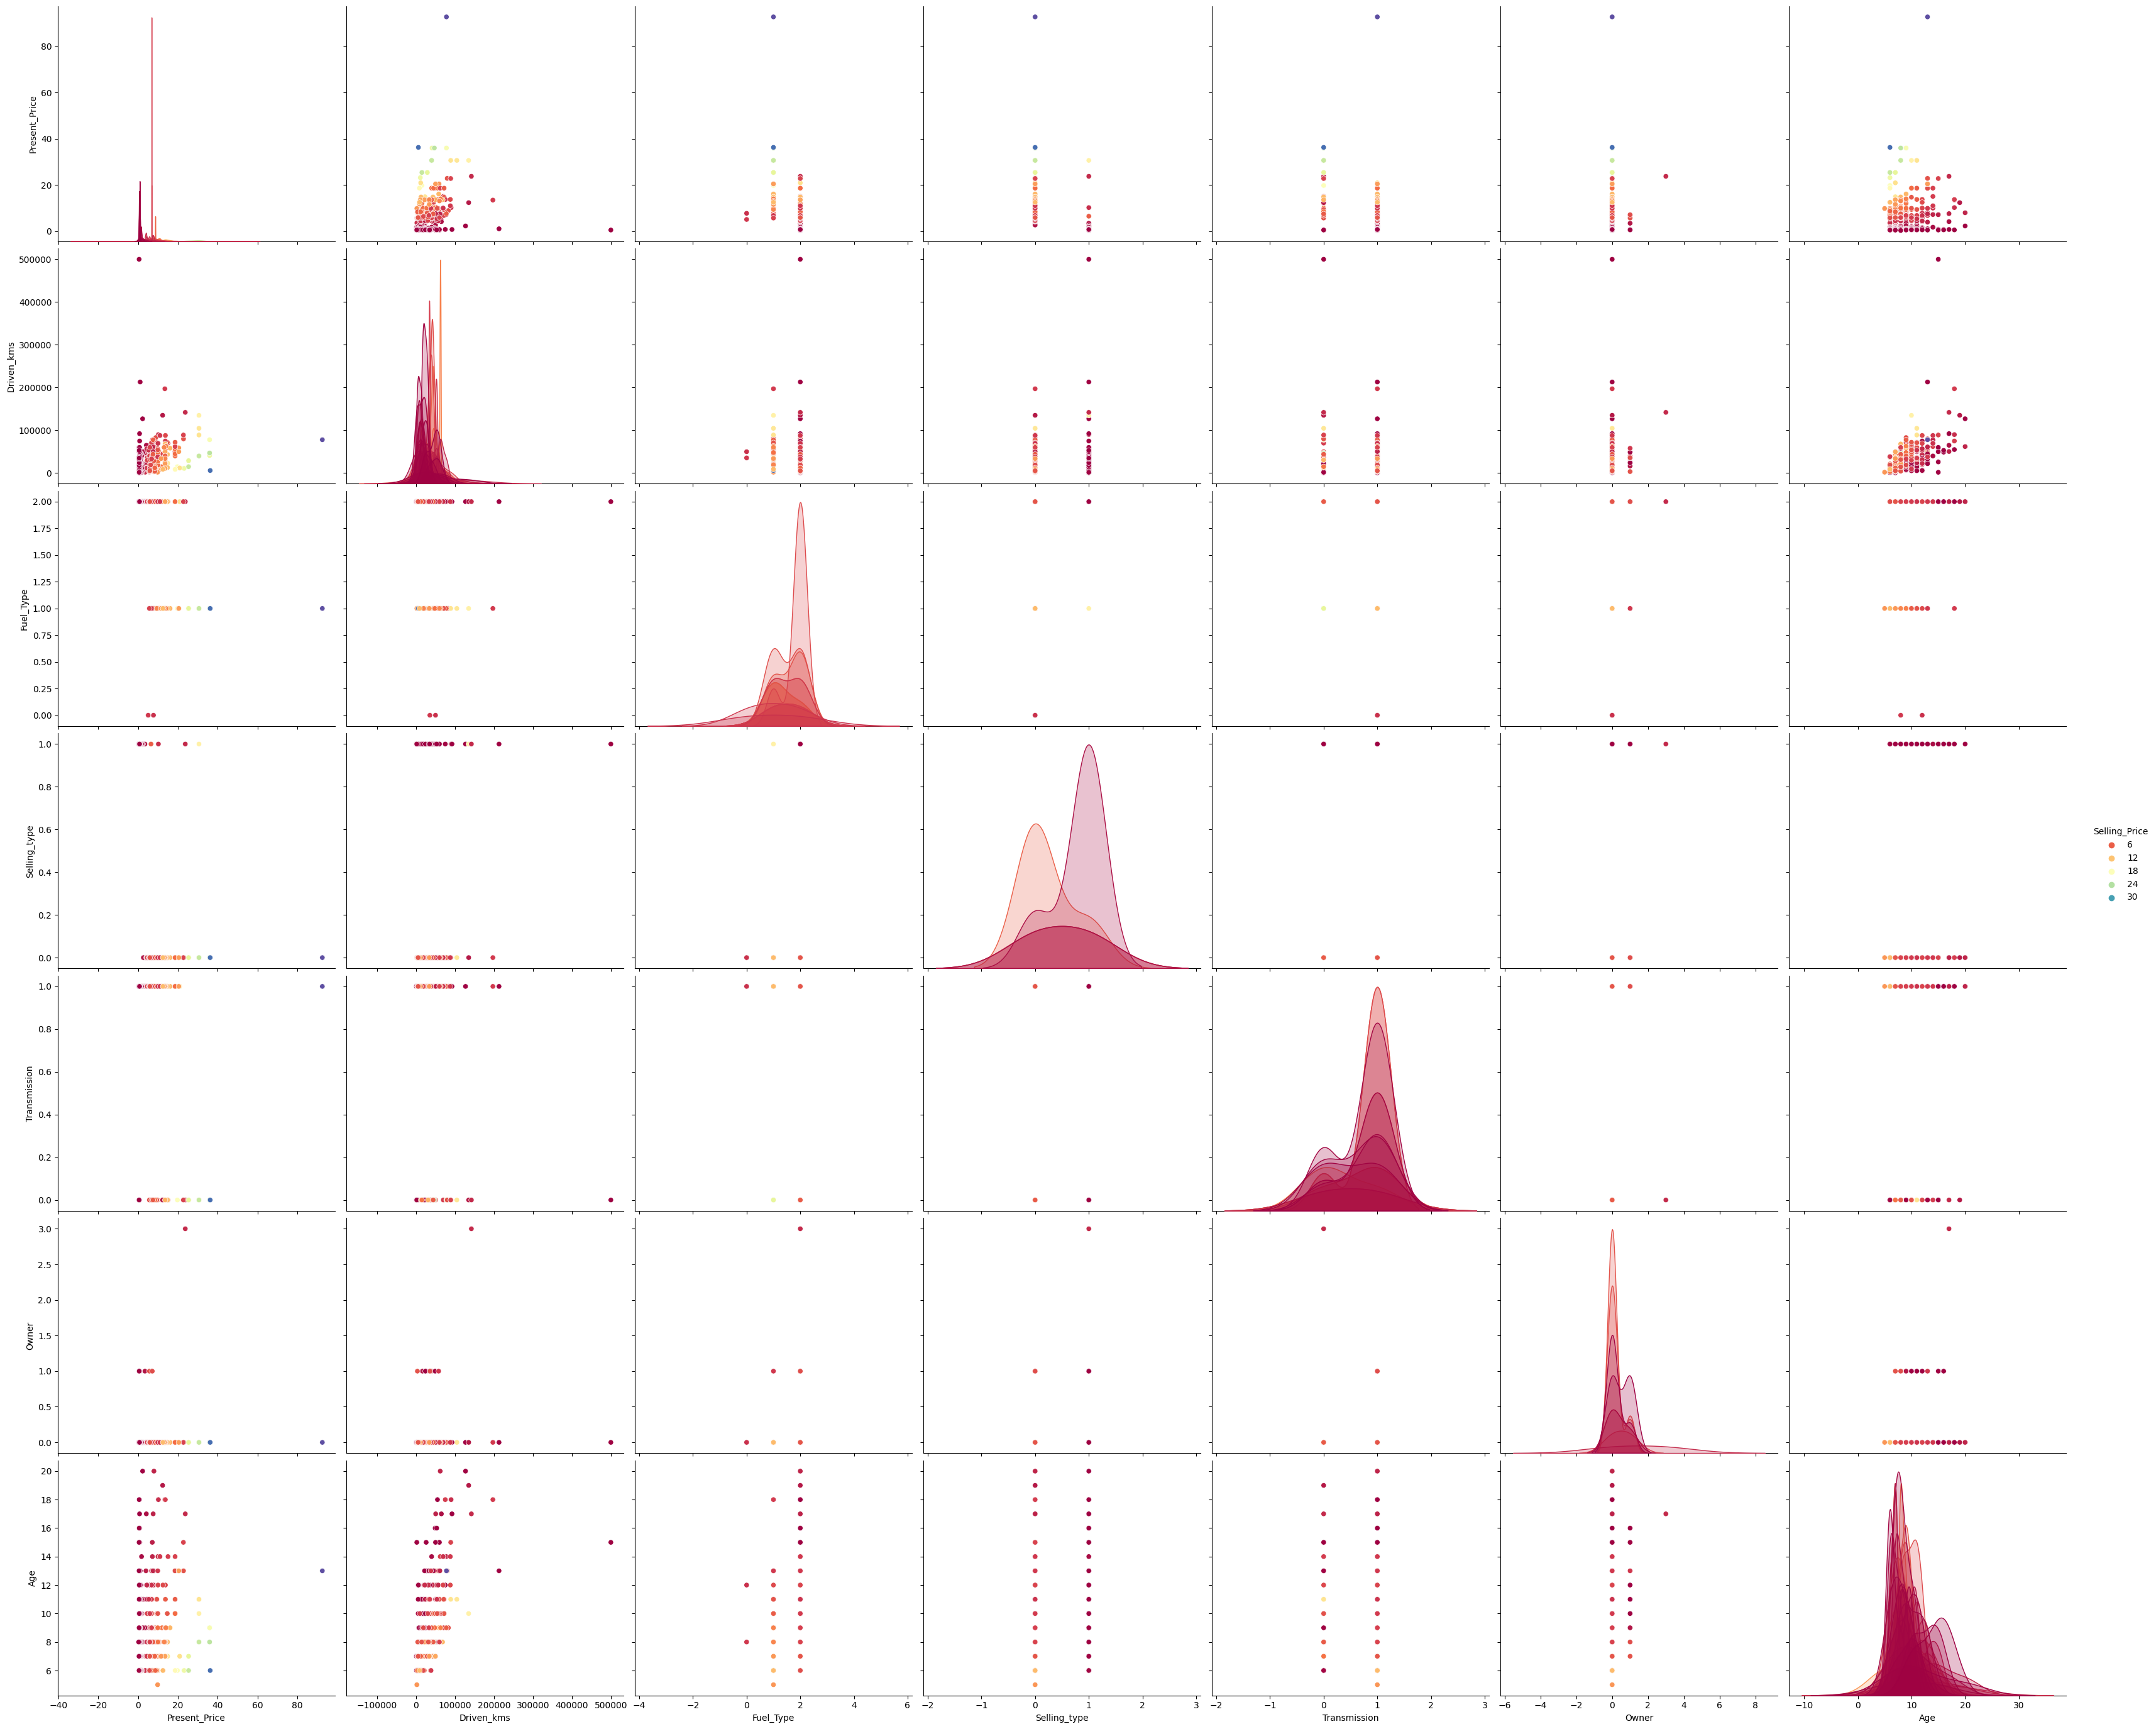

In [9]:
plt.tight_layout(pad = 1)
sns.pairplot(car_data, hue = 'Selling_Price', height = 4, aspect = 1.2, palette = 'Spectral')

<Axes: >

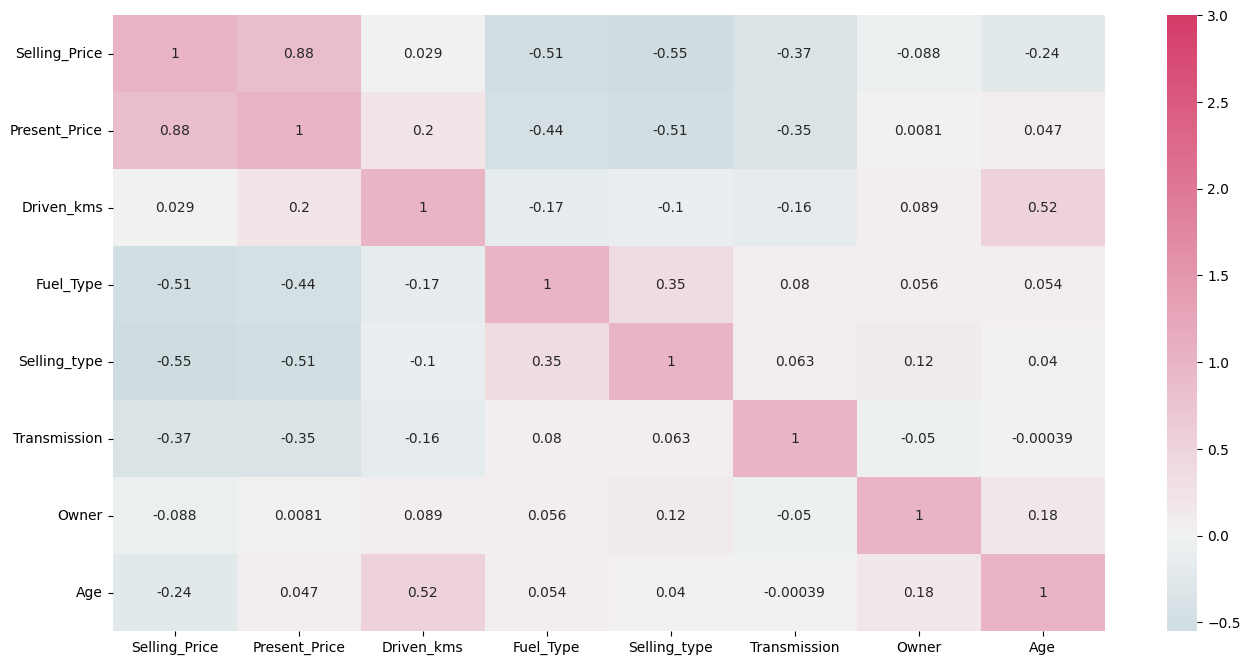

In [10]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (16,8))
cmap = sns.diverging_palette(220,0, as_cmap = True)
car_corr = car_data.drop(['Car_Name'], axis = 1)
sns.heatmap(car_corr.corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

#### FEATURE ENGINEERING

In [11]:
#Encoding the Car_Name Values
models = pd.get_dummies(car_data['Car_Name'], prefix = 'name',prefix_sep = '_', drop_first = True)
car_data = pd.concat([models,car_data], axis = 1)
car_data.drop(['Car_Name'], axis = 1,inplace = True)

### Scaling the Selling_Price Values
selling_price_scaler = MinMaxScaler()
car_data['Selling_Price'] = selling_price_scaler.fit_transform(np.array(car_data['Selling_Price']).reshape(-1,1))

### Scaling the Present_Price Values
present_price_scaler = MinMaxScaler()
car_data['Present_Price'] = present_price_scaler.fit_transform(np.array(car_data['Present_Price']).reshape(-1,1))

### Scaling the Driven_kms Values
kms_scaler = MinMaxScaler()
car_data['Driven_kms'] = kms_scaler.fit_transform(np.array(car_data['Driven_kms']).reshape(-1,1))

In [12]:
car_data.head()

,name_Activa 3g,name_Activa 4g,name_Bajaj ct 100,name_Bajaj Avenger 150,name_Bajaj Avenger 150 street,name_Bajaj Avenger 220,name_Bajaj Avenger 220 dtsi,name_Bajaj Avenger Street 220,name_Bajaj Discover 100,name_Bajaj Discover 125,...,name_wagon r,name_xcent,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,0.093123,0.057109,0.053053,2,0,1,0,9
1,False,False,False,False,False,False,False,False,False,False,...,False,False,0.133238,0.099913,0.085085,1,0,1,0,10
2,False,False,False,False,False,False,False,False,False,False,...,False,False,0.204871,0.103273,0.012813,2,0,1,0,6
3,False,False,False,False,False,False,False,False,False,False,...,True,False,0.078797,0.041504,0.009409,2,0,1,0,12
4,False,False,False,False,False,False,False,False,False,False,...,False,False,0.128940,0.070980,0.083984,1,0,1,0,9


#### SEPARATING THE FEATURES AND TARGETS

In [13]:
targets = np.array(car_data['Selling_Price'])
features_raw = car_data
features_raw = features_raw.drop(['Selling_Price'], axis = 1)
features = np.array(features_raw)

#### MODEL SELECTION AND HYPERPARAMETER TUNING

In [14]:
mae = []
mse =[]
r2 = []
regressor = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR()]
for i in range (7):
    for j in range (500):
        x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = j ,test_size = 0.2, shuffle = True)
        test_regressor = regressor[i]
        test_regressor.fit(x_train,y_train)
        y_predict = test_regressor.predict(x_test)
        mae.append(mean_absolute_error(y_test,y_predict))
        mse.append(mean_squared_error(y_test,y_predict))
        r2.append(r2_score(y_test,y_predict))
        print('Trial run '+str(i+1)+'.'+str(j)+' Regressor : ' + str(test_regressor) + ' completed : MAE =  '+str(mean_absolute_error(y_test,y_predict))+ ' MSE =  '+str(mean_squared_error(y_test,y_predict))+' R2 Score =  '+str(r2_score(y_test,y_predict)))

Trial run 1.0 Regressor : LinearRegression() completed : MAE =  0.04559867543019123 MSE =  0.005801419728567096 R2 Score =  0.7204534482585101
Trial run 1.1 Regressor : LinearRegression() completed : MAE =  12254789415.867426 MSE =  2.0447101482308348e+21 R2 Score =  -1.1479932307774393e+23
Trial run 1.2 Regressor : LinearRegression() completed : MAE =  0.06038085290101801 MSE =  0.007923634625325148 R2 Score =  0.4745284466280635
Trial run 1.3 Regressor : LinearRegression() completed : MAE =  1622671789.2563336 MSE =  4.0413486858064085e+19 R2 Score =  -2.2955471732564833e+21
Trial run 1.4 Regressor : LinearRegression() completed : MAE =  0.058435363038507895 MSE =  0.008428599483729107 R2 Score =  0.661845572322987
Trial run 1.5 Regressor : LinearRegression() completed : MAE =  2234003672.3648376 MSE =  4.607948474882225e+19 R2 Score =  -2.091045092574307e+21
Trial run 1.6 Regressor : LinearRegression() completed : MAE =  0.09554139877914432 MSE =  0.021542445481532373 R2 Score =  -0

In [15]:
print('Lowest MAE Score = ' + str(min(mae)))
mae_location = int(mae.index(min(mae)))
mae_best_random_state = int(mae_location%500)
mae_regressor = str(regressor[int(mae_location//500)])
print ('Random State = ' + str(mae_best_random_state) + '  Regressor = ' + str(mae_regressor))

print('Lowest MSE Score = ' + str(min(mse)))
mse_location = int(mse.index(min(mse)))
mse_best_random_state = int(mse_location%500)
mse_regressor = str(regressor[int(mse_location//500)])
print ('Random State = ' + str(mse_best_random_state) + '  Regressor = ' + str(mse_regressor))

print('Best R2 Score = ' + str(max(r2)))
r2_location = int(r2.index(max(r2)))
r2_best_random_state = int(r2_location%500)
r2_regressor = str(regressor[int(r2_location//500)])
print ('Random State = ' + str(r2_best_random_state) + '  Regressor = ' + str(r2_regressor))

Lowest MAE Score = 0.009076236554088972
Random State = 68  Regressor = RandomForestRegressor()
Lowest MSE Score = 0.00021295410223690588
Random State = 482  Regressor = RandomForestRegressor()
Best R2 Score = 0.9860502631330306
Random State = 67  Regressor = RandomForestRegressor()


#### MODEL TRAINING

In [16]:
car_price_predictor = (regressor[int(mse_location/500)])
x_train, x_test, y_train, y_test = train_test_split (features, targets, random_state = mse_best_random_state ,test_size = 0.15, shuffle = True)
car_price_predictor.fit(x_train,y_train)

RandomForestRegressor()

#### MODEL EVALUATIOM

In [17]:
y_predicted = car_price_predictor.predict(x_test)
y_predicted_rescaled = selling_price_scaler.inverse_transform(y_predicted.reshape(-1,1))
y_test_rescaled = selling_price_scaler.inverse_transform(y_test.reshape(-1,1))

In [18]:
real_values = np.array(np.round(y_test_rescaled, 2)).tolist()
predicted_values = np.array(np.round(y_predicted_rescaled, 2)).tolist()

df = pd.DataFrame({'Actual Prices': real_values, 'Predicted Prices': predicted_values})
print ('\n')
print(df.head(20))
print('\nThe Mean Absolute Error is : ' + str(mean_absolute_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe Mean Squared Error is : ' + str(mean_squared_error (y_test_rescaled, y_predicted_rescaled)))
print('\nThe R2 Score is : ' + str(r2_score (y_test_rescaled, y_predicted_rescaled)))



   Actual Prices Predicted Prices
0         [3.65]           [4.09]
1         [7.75]           [8.15]
2          [6.0]           [6.64]
3         [4.95]           [5.33]
4          [5.2]           [4.91]
5         [1.25]            [1.1]
6          [0.9]           [1.11]
7         [5.95]            [5.7]
8         [0.95]           [1.12]
9         [8.35]           [8.16]
10        [0.38]            [0.3]
11         [3.1]           [2.81]
12        [8.25]           [7.31]
13        [2.85]           [2.61]
14        [3.35]           [4.53]
15         [4.5]           [4.71]
16        [6.25]            [5.7]
17        [1.05]           [2.26]
18        [0.35]           [0.36]
19         [3.5]            [3.7]

The Mean Absolute Error is : 0.3475239130434782

The Mean Squared Error is : 0.22549089804347813

The R2 Score is : 0.9843451398516125


#### WHOLE CSV IMPLEMENTATION

In [19]:
targets_predicted = car_price_predictor.predict(features)
targets_predicted_resacled = selling_price_scaler.inverse_transform(targets_predicted.reshape(-1,1))
predictions = (np.round(targets_predicted_resacled, 2)).tolist()
predicted_prices = pd.Series((predictions))

In [20]:
dataset_final = cloned_car_data.reindex(columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Year', 'Age',  'Driven_kms', 'Present_Price', 'Selling_Price'])
dataset_final.head()

,Car_Name,Fuel_Type,Selling_type,Transmission,Owner,Year,Age,Driven_kms,Present_Price,Selling_Price
0,ritz,Petrol,Dealer,Manual,0,2014,9,27000,5.59,3.35
1,sx4,Diesel,Dealer,Manual,0,2013,10,43000,9.54,4.75
2,ciaz,Petrol,Dealer,Manual,0,2017,6,6900,9.85,7.25
3,wagon r,Petrol,Dealer,Manual,0,2011,12,5200,4.15,2.85
4,swift,Diesel,Dealer,Manual,0,2014,9,42450,6.87,4.60


In [21]:
dataset_final = pd.concat([dataset_final,predicted_prices],axis = 1)
dataset_final.columns.values[10] = 'Predicted_Selling_Price'
dataset_final['Predicted_Selling_Price'] = dataset_final['Predicted_Selling_Price'].astype(str)
dataset_final.head(25)

,Car_Name,Fuel_Type,Selling_type,Transmission,Owner,Year,Age,Driven_kms,Present_Price,Selling_Price,Predicted_Selling_Price
0,ritz,Petrol,Dealer,Manual,0,2014,9,27000,5.59,3.35,[4.53]
1,sx4,Diesel,Dealer,Manual,0,2013,10,43000,9.54,4.75,[5.12]
2,ciaz,Petrol,Dealer,Manual,0,2017,6,6900,9.85,7.25,[7.93]
3,wagon r,Petrol,Dealer,Manual,0,2011,12,5200,4.15,2.85,[2.61]
4,swift,Diesel,Dealer,Manual,0,2014,9,42450,6.87,4.60,[4.44]
5,vitara brezza,Diesel,Dealer,Manual,0,2018,5,2071,9.83,9.25,[8.73]
6,ciaz,Petrol,Dealer,Manual,0,2015,8,18796,8.12,6.75,[6.6]
7,s cross,Diesel,Dealer,Manual,0,2015,8,33429,8.61,6.50,[6.73]
8,ciaz,Diesel,Dealer,Manual,0,2016,7,20273,8.89,8.75,[8.0]
9,ciaz,Diesel,Dealer,Manual,0,2015,8,42367,8.92,7.45,[7.32]


In [22]:
#saving the final train price data
dataset_final.to_csv('/kaggle/working/Processed_Data.csv', index = False)